In [1]:
import datetime
import sys
import warnings
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer

warnings.simplefilter("ignore")
pd.set_option("display.max_columns", None)
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("/Users/jason/Downloads/archive (6)/DataCoSupplyChainDataset.csv", encoding = "ISO-8859-1")

In [3]:
df.head(100)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,TRANSFER,2,4,51.980000,236.250000,Advance shipping,0,24,Women's Apparel,Caguas,Puerto Rico,XXXXXXXXX,Mary,8917,Smith,XXXXXXXXX,Consumer,PR,4992 Jagged Forest Subdivision,725.0,5,Golf,18.224871,-66.370522,LATAM,Barueri,Brasil,8917,4/13/2017 14:25,57106,502,13.750000,0.06,142841,50.000000,0.22,5,250.000000,236.250000,51.980000,South America,São Paulo,PENDING,NaN,502,24,NaN,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,50.000000,0,4/15/2017 14:25

# Data Cleaning

## Renaming with snake_convention

In [4]:
df.columns = [
    'type',
    'days_for_shipping_real',
    'days_for_shipment_scheduled',
    'benefit_per_order',
    'sales_per_customer',
    'delivery_status',
    'late_delivery_risk',
    'category_id',
    'category_name',
    'customer_city',
    'customer_country',
    'customer_email',
    'customer_fname',
    'customer_id',
    'customer_lname',
    'customer_password',
    'customer_segment',
    'customer_state',
    'customer_street',
    'customer_zipcode',
    'department_id',
    'department_name',
    'latitude',
    'longitude',
    'market',
    'order_city',
    'order_country',
    'order_customer_id',
    'order_date',
    'order_id',
    'order_item_cardprod_id',
    'order_item_discount',
    'order_item_discount_rate',
    'order_item_id',
    'order_item_product_price',
    'order_item_profit_ratio',
    'order_item_quantity',
    'sales',
    'order_item_total',
    'order_profit_per_order',
    'order_region',
    'order_state',
    'order_status',
    'order_zipcode', 
    'product_card_id',
    'product_category_id',
    'product_description',
    'product_image',
    'product_name',
    'product_price',
    'product_status',
    'shipping_date',
    'shipping_mode'   
]

## Dropping Columns

In [5]:
df = df.drop(columns=['customer_email','customer_fname', 'customer_lname','customer_password', 'product_image', 'product_status','order_zipcode'])



## Missing Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   type                         180519 non-null  object 
 1   days_for_shipping_real       180519 non-null  int64  
 2   days_for_shipment_scheduled  180519 non-null  int64  
 3   benefit_per_order            180519 non-null  float64
 4   sales_per_customer           180519 non-null  float64
 5   delivery_status              180519 non-null  object 
 6   late_delivery_risk           180519 non-null  int64  
 7   category_id                  180519 non-null  int64  
 8   category_name                180519 non-null  object 
 9   customer_city                180519 non-null  object 
 10  customer_country             180519 non-null  object 
 11  customer_id                  180519 non-null  int64  
 12  customer_segment             180519 non-null  object 
 13 

In [7]:
df = df.drop(columns=['product_description'])

Can drop all product_description as they're all NaN

## Converting to numerics

In [8]:
df['type'].value_counts()

type
DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: count, dtype: int64

In [9]:
df['type'] = df['type'].replace({'DEBIT':1, 'TRANSFER':2, 'PAYMENT':3 , 'CASH':4})

In [10]:
df['type'].value_counts()

type
1    69295
2    49883
3    41725
4    19616
Name: count, dtype: int64

In [11]:
df['delivery_status'].value_counts()

delivery_status
Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: count, dtype: int64

In [12]:
df['delivery_status'] = df['delivery_status'].replace({'Late delivery':3, 'Advance shipping':1, 'Shipping on time':0 , 'Shipping canceled':2})

In [13]:
df['category_name'].value_counts()

category_name
Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves              1070
Trade-In                  974
Video Games               838
Children's Clothing       652
Women's Clothing          650
Baseball & Softball       632
Hockey                    614
Cameras                   592
Toys                      529
Golf Shoes                524
Pet Supplies              492
Garden                    484
Crafts                    484
DVDs                      483
Computers                 442
Golf Apparel              441
Hunting & Shooting        440
Music                     434
Consumer Electronics      431
Boxing & MMA              

In [14]:
df = df.drop(columns =['category_name'])

Can Drop all Category names as Category ID already represents them 

In [15]:
df['customer_city'].value_counts()

customer_city
Caguas         66770
Chicago         3885
Los Angeles     3417
Brooklyn        3412
New York        1816
               ...  
Bartlett          25
Malden            22
Ponce             22
Freehold          13
CA                 3
Name: count, Length: 563, dtype: int64

In [16]:
unique_cities = pd.unique(df['customer_city'])

city_to_number = {city: i for i, city in enumerate(unique_cities)}

df['customer_city'] = df['customer_city'].map(city_to_number)

In [17]:
df['customer_country'].value_counts()

customer_country
EE. UU.        111146
Puerto Rico     69373
Name: count, dtype: int64

In [18]:
df['customer_country'] = df['customer_country'].replace({ 'EE. UU.':0, 'Puerto Rico':1 })

In [19]:
df['customer_country'].value_counts()

customer_country
0    111146
1     69373
Name: count, dtype: int64

In [20]:
df['customer_segment'].value_counts()

customer_segment
Consumer       93504
Corporate      54789
Home Office    32226
Name: count, dtype: int64

In [21]:
df['customer_segment'] = df['customer_segment'].replace({ 'Consumer':0, 'Corporate':1,'Home Office':2 })

In [22]:
df['customer_state'].value_counts()

customer_state
PR       69373
CA       29223
NY       11327
TX        9103
IL        7631
FL        5456
OH        4095
PA        3824
MI        3804
NJ        3191
AZ        3026
GA        2503
MD        2415
NC        1992
CO        1914
VA        1849
OR        1668
MA        1607
TN        1582
NV        1440
MO        1354
HI        1248
CT        1094
UT         968
NM         949
LA         948
WA         920
WI         850
MN         672
SC         665
IN         581
DC         579
KY         487
KS         458
DE         269
RI         243
WV         241
OK         232
ND         215
ID         167
AR         164
MT          87
IA          67
AL          35
95758        2
91732        1
Name: count, dtype: int64

In [23]:
unique_states = pd.unique(df['customer_state'])
unique_to_number = {state: i for i, state in enumerate(unique_states)}
df['customer_state'] = df['customer_state'].map(unique_to_number)

In [24]:
df['customer_street'].value_counts()

customer_street
9126 Wishing Expressway     122
4388 Burning Goose Ridge    117
4720 Noble Hills Wynd       116
2878 Hazy Wagon  Thicket    113
398 Emerald Grove           109
                           ... 
7676 Colonial Towers          1
6425 Thunder Impasse          1
376 Silver Terrace            1
5420 Rocky Port               1
8621 Broad Forest             1
Name: count, Length: 7458, dtype: int64

I will not include street name in my analysis but I will mention the busiest streets which may be of special interest to the supply chain team.

In [25]:
unique_streets = pd.unique(df['customer_street'])

street_to_number = {street: i for i, street in enumerate(unique_streets)}

df['customer_street'] = df['customer_street'].map(street_to_number)

In [26]:
df['department_name'].value_counts()

department_name
Fan Shop              66861
Apparel               48998
Golf                  33220
Footwear              14525
Outdoors               9686
Fitness                2479
Discs Shop             2026
Technology             1465
Pet Shop                492
Book Shop               405
Health and Beauty       362
Name: count, dtype: int64

In [27]:
df = df.drop(columns=['department_name'])

Can drop department name as department ID already represents them

In [28]:
df['market'].value_counts()

market
LATAM           51594
Europe          50252
Pacific Asia    41260
USCA            25799
Africa          11614
Name: count, dtype: int64

In [29]:
unique_markets = pd.unique(df['market'])

market_to_number = {market: i for i, market in enumerate(unique_markets)}

df['market'] = df['market'].map(market_to_number)

In [30]:
df['order_city'].value_counts()

order_city
Santo Domingo    2211
New York City    2202
Los Angeles      1845
Tegucigalpa      1783
Managua          1682
                 ... 
Libourne            1
Bergerac            1
Juliaca             1
Takasaki            1
Pernik              1
Name: count, Length: 3597, dtype: int64

 I will not include city names in my analysis but I will mention the busiest cities which may be of special interest to the supply chain team.

In [31]:
unique_city = pd.unique(df['order_city'])

city_to_number = {city: i for i, city in enumerate(unique_city)}

df['order_city'] = df['order_city'].map(city_to_number)


In [32]:
df['order_country'].value_counts()

order_country
Estados Unidos       24840
Francia              13222
México               13172
Alemania              9564
Australia             8497
                     ...  
Guinea Ecuatorial        2
Kuwait                   2
Sáhara Occidental        2
Burundi                  1
Serbia                   1
Name: count, Length: 164, dtype: int64

In [33]:
unique_countries = pd.unique(df['order_country'])

country_to_number = {country: i for i, country in enumerate(unique_countries)}

df['order_country'] = df['order_country'].map(country_to_number)

In [34]:
df['order_date'].value_counts()

order_date
12/14/2016 12:29    5
2/22/2015 14:38     5
2/17/2016 14:08     5
12/31/2016 9:50     5
2/11/2016 16:35     5
                   ..
9/5/2016 5:58       1
9/6/2016 1:56       1
9/6/2016 3:20       1
9/6/2016 19:27      1
1/17/2016 5:56      1
Name: count, Length: 65752, dtype: int64

In [35]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [36]:
df['order_region'].value_counts()

order_region
Central America    28341
Western Europe     27109
South America      14935
Oceania            10148
Northern Europe     9792
Southeast Asia      9539
Southern Europe     9431
Caribbean           8318
West of USA         7993
South Asia          7731
Eastern Asia        7280
East of USA         6915
West Asia           6009
US Center           5887
South of  USA       4045
Eastern Europe      3920
West Africa         3696
North Africa        3232
East Africa         1852
Central Africa      1677
Southern Africa     1157
Canada               959
Central Asia         553
Name: count, dtype: int64

In [37]:
unique_region = pd.unique(df['order_region'])

region_to_number = {region: i for i, region in enumerate(unique_region)}

df['order_region'] = df['order_region'].map(region_to_number)

In [38]:
df['order_state'].value_counts().head(10)

order_state
Inglaterra                     6722
California                     4966
Isla de Francia                4580
Renania del Norte-Westfalia    3303
San Salvador                   3055
Nueva York                     2753
Distrito Federal               2559
Texas                          2446
Nueva Gales del Sur            2370
Santo Domingo                  2211
Name: count, dtype: int64

In [39]:
unique_state = pd.unique(df['order_state'])

state_to_number = {state: i for i, state in enumerate(unique_state)}

df['order_state'] = df['order_state'].map(state_to_number)

In [40]:
df['order_status'].value_counts()

order_status
COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: count, dtype: int64

In [41]:
status_unique = pd.unique(df['order_status'])

status_to_number = {status: i for i, status in enumerate(status_unique)}

df['order_status'] = df['order_status'].map(status_to_number)

In [42]:
df['product_name'].value_counts()

product_name
Perfect Fitness Perfect Rip Deck                 24515
Nike Men's CJ Elite 2 TD Football Cleat          22246
Nike Men's Dri-FIT Victory Golf Polo             21035
O'Brien Men's Neoprene Life Vest                 19298
Field & Stream Sportsman 16 Gun Fire Safe        17325
                                                 ...  
Stiga Master Series ST3100 Competition Indoor       27
SOLE E35 Elliptical                                 15
Bushnell Pro X7 Jolt Slope Rangefinder              11
Bowflex SelectTech 1090 Dumbbells                   10
SOLE E25 Elliptical                                 10
Name: count, Length: 118, dtype: int64

In [43]:
df = df.drop(columns=['product_name', 'product_card_id'])

We can drop product name and product card ID as product ID already identifies it

In [44]:
df['shipping_date'].value_counts()

shipping_date
1/5/2016 5:58      10
7/16/2015 10:14    10
4/17/2015 22:16    10
5/27/2015 6:48     10
5/9/2015 18:02     10
                   ..
3/29/2015 18:06     1
4/2/2015 12:40      1
4/2/2015 23:10      1
3/31/2015 7:03      1
1/21/2016 5:56      1
Name: count, Length: 63701, dtype: int64

In [45]:
df['shipping_date'] = pd.to_datetime(df['shipping_date'])

In [46]:
df['shipping_mode'].value_counts()

shipping_mode
Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: count, dtype: int64

In [47]:
unique_mode = pd.unique(df['shipping_mode'])

mode_to_number = {mode: i for i ,mode in enumerate(unique_mode)}

df['shipping_mode'] = df['shipping_mode'].map(mode_to_number)

In [48]:
df['shipping_mode'].value_counts()

shipping_mode
0    107752
2     35216
1     27814
3      9737
Name: count, dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   type                         180519 non-null  int64         
 1   days_for_shipping_real       180519 non-null  int64         
 2   days_for_shipment_scheduled  180519 non-null  int64         
 3   benefit_per_order            180519 non-null  float64       
 4   sales_per_customer           180519 non-null  float64       
 5   delivery_status              180519 non-null  int64         
 6   late_delivery_risk           180519 non-null  int64         
 7   category_id                  180519 non-null  int64         
 8   customer_city                180519 non-null  int64         
 9   customer_country             180519 non-null  int64         
 10  customer_id                  180519 non-null  int64         
 11  customer_segment          

# EDA By year/quarters and predictive analytics of future quarters/years based on previous ones // interactive maps for location and // high correlaion features


## Mapping

from ydata_profiling import ProfileReport

ProfileReport(df)

In [50]:
df.describe()

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,customer_city,customer_country,customer_id,customer_segment,customer_state,customer_street,customer_zipcode,department_id,latitude,longitude,market,order_city,order_country,order_customer_id,order_date,order_id,order_item_cardprod_id,order_item_discount,order_item_discount_rate,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total,order_profit_per_order,order_region,order_state,order_status,product_category_id,product_price,shipping_date,shipping_mode
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.00000,180516.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519,180519.000000
mean,2.064603,3.497654,2.931847,21.974989,183.107609,1.961184,0.548291,31.851451,125.844870,0.384297,6691.379495,0.660545,5.985996,2929.62435,35921.126914,5.443460,29.719955,-84.915675,2.249952,867.827652,25.008326,6691.379495,2016-06-12 17:47:04.669868544,36221.894903,692.509764,20.664741,0.101668,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,9.813538,207.813050,2.278857,31.851451,141.232550,2016-06-16 05:45:23.202433024,0.706059
min,1.000000,0.000000,0.000000,-4274.979980,7.490000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,603.000000,2.000000,-33.937553,-158.025986,0.000000,0.000000,0.000000,1.000000,2015-01-01 00:00:00,1.000000,19.000000,0.000000,0.000000,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,0.000000,0.000000,0.000000,2.000000,9.990000,2015-01-03 00:00:00,0.000000
25%,1.000000,2.000000,2.000000,7.000000,104.379997,1.000000,0.000000,18.000000,0.000000,0.000000,3258.500000,0.000000,0.000000,1273.00000,725.000000,4.000000,18.265432,-98.446312,1.000000,177.000000,9.000000,3258.500000,2015-09-21 13:49:00,18057.000000,403.000000,5.400000,0.040000,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,5.000000,40.000000,0.000000,18.000000,50.000000,2015-09-25 06:59:00,0.000000
50%,2.000000,3.000000,4.000000,31.520000,163.990005,3.000000,1.000000,29.000000,61.000000,0.000000,6457.000000,0.000000,1.000000,2701.00000,19380.000000,5.000000,33.144863,-76.847908,3.000000,560.000000,18.000000,6457.000000,2016-06-11 13:06:00,36140.000000,627.000000,14.000000,0.100000,90260.000000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,10.000000,119.000000,2.000000,29.000000,59.990002,2016-06-15 08:32:00,0.000000
75%,3.000000,5.000000,4.000000,64.800003,247.399994,3.000000,1.000000,45.000000,222.000000,1.000000,9779.000000,1.000000,9.000000,4421.00000,78207.000000,7.000000,39.279617,-66.370583,4.000000,1332.000000,30.000000,9779.000000,2017-03-01 08:42:00,54144.000000,1004.000000,29.990000,0.160000,135389.500000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,13.000000,296.000000,3.000000,45.000000,199.990005,2017-03-04 21:29:00,1.000000
max,4.000000,6.000000,4.000000,911.799988,1939.989990,3.000000,1.000000,76.000000,562.000000,1.000000,20757.000000,2.000000,45.000000,7457.00000,99205.000000,12.000000,48.781933,115.263077,4.000000,3596.000000,163.000000,20757.000000,2018-01-31 23:38:00,77204.000000,1363.000000,500.000000,0.250000,180519.000000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,22.000000,1088.000000,8.000000,76.000000,1999.989990,2018-02-06 22:14:00,3.000000
std,1.022494,1.623722,1.374449,104.433526,120.043670,1.220903,0.497664,15.640064,155.688246,0.486430,4162.918106,0.762408,9.236205,1932

In [51]:
correlation_matrix = df.corr()
late_delivery_risk_correlation = correlation_matrix['late_delivery_risk']
late_delivery_risk_correlation_ord = late_delivery_risk_correlation.sort_values(ascending=False)
print(late_delivery_risk_correlation_ord)

late_delivery_risk             1.000000
delivery_status                0.937422
days_for_shipping_real         0.401415
shipping_mode                  0.277919
order_state                    0.012250
order_city                     0.011962
customer_city                  0.004585
customer_street                0.003574
customer_zipcode               0.003148
type                           0.001947
product_category_id            0.001752
category_id                    0.001752
order_item_cardprod_id         0.001490
customer_id                    0.001484
order_customer_id              0.001484
customer_segment               0.001419
order_country                  0.001138
department_id                  0.001077
shipping_date                  0.000744
latitude                       0.000679
order_item_discount_rate       0.000404
customer_state                -0.000060
order_item_quantity           -0.000139
order_item_discount           -0.000750
customer_country              -0.001044


In [52]:
df['longitude']

0         -66.037056
1         -66.037064
2        -121.881279
3        -118.291016
4         -66.037048
             ...    
180514    -73.942711
180515   -119.018700
180516    -72.967155
180517    -66.370575
180518    -66.370613
Name: longitude, Length: 180519, dtype: float64

In [53]:
df['late_delivery_risk'].count()

180519

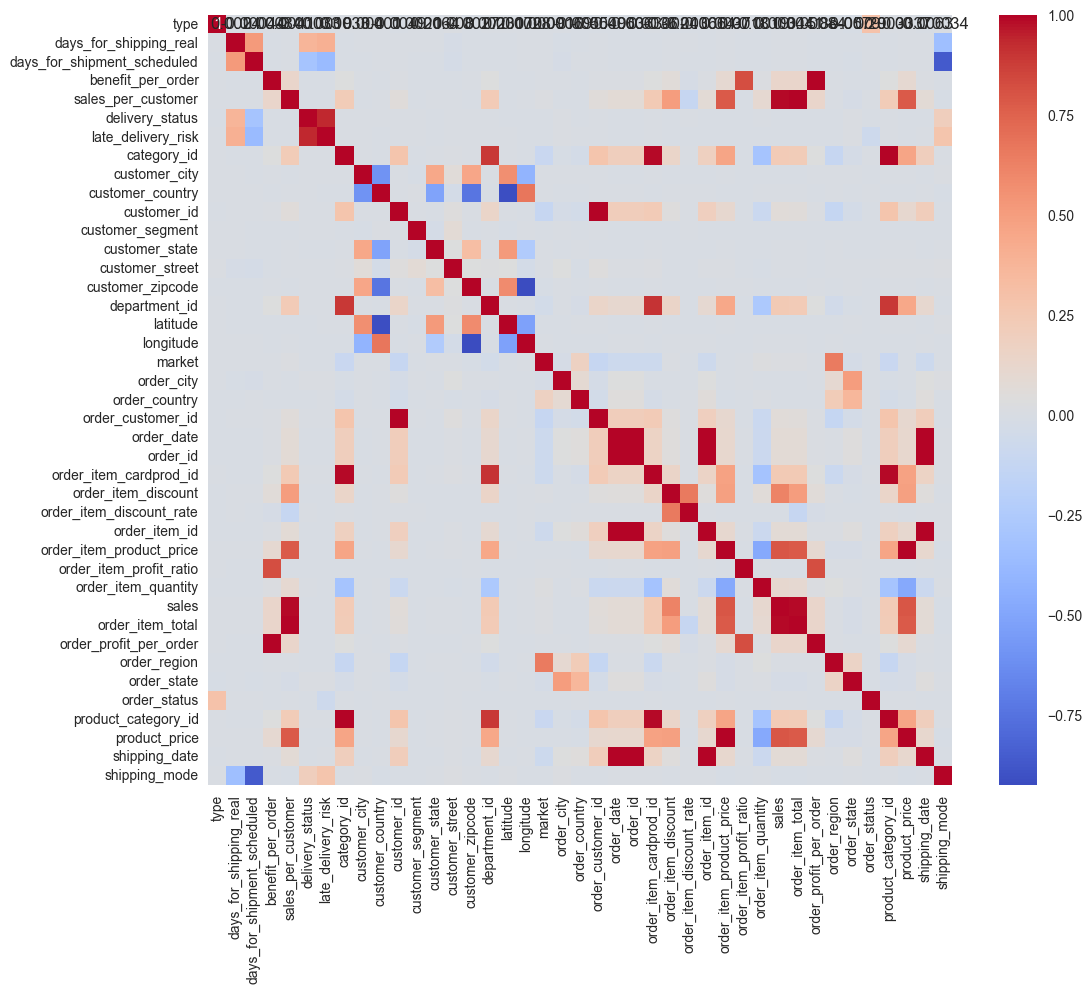

In [54]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.xticks(ticks=[i + 0.5 for i in range(len(correlation_matrix.columns))], 
           labels=correlation_matrix.columns, rotation=90)
plt.yticks(ticks=[i + 0.5 for i in range(len(correlation_matrix.columns))], 
           labels=correlation_matrix.columns, rotation=0)

plt.show()

In [55]:
correlation_matrix = df.corr()

late_delivery_risk_correlation = correlation_matrix['late_delivery_risk'].sort_values(ascending=False)

print(late_delivery_risk_correlation)

late_delivery_risk             1.000000
delivery_status                0.937422
days_for_shipping_real         0.401415
shipping_mode                  0.277919
order_state                    0.012250
order_city                     0.011962
customer_city                  0.004585
customer_street                0.003574
customer_zipcode               0.003148
type                           0.001947
product_category_id            0.001752
category_id                    0.001752
order_item_cardprod_id         0.001490
customer_id                    0.001484
order_customer_id              0.001484
customer_segment               0.001419
order_country                  0.001138
department_id                  0.001077
shipping_date                  0.000744
latitude                       0.000679
order_item_discount_rate       0.000404
customer_state                -0.000060
order_item_quantity           -0.000139
order_item_discount           -0.000750
customer_country              -0.001044


In [56]:
df['late_delivery_risk'].value_counts()

late_delivery_risk
1    98977
0    81542
Name: count, dtype: int64

In [57]:
df['late_delivery_risk'] = df['late_delivery_risk'].replace({ 0:2, 1:4 })

mapbox_access_token = 'pk.eyJ1Ijoiamxkb3lsZSIsImEiOiJjbHZ3Y3NnaXkyODFjMmlubmFmcGI5MWQ5In0.oRwde6APr3-vxwRBjCdjFw'
fig = px.scatter_mapbox(df,
                        lon = df['longitude'],
                        lat = df['latitude'],
                        zoom = 3,
                        color = df['late_delivery_risk'],
                        size = df['late_delivery_risk'],
                        width = 1200,
                        height = 900,
                        title = 'Late Deliveries (4 & Yellow Dots) & On Time Deliveries (2 & Blue Dots)',
                        mapbox_style='open-street-map',
                       )
fig.show()

In [58]:
df['late_delivery_risk'] = df['late_delivery_risk'].replace({ 4:1, 2:0 })

import plotly.express as px

mapbox_access_token = 'pk.eyJ1Ijoiamxkb3lsZSIsImEiOiJjbHZ3Y3NnaXkyODFjMmlubmFmcGI5MWQ5In0.oRwde6APr3-vxwRBjCdjFw'
fig = px.scatter_mapbox(df,
                        lon = df['longitude'],
                        lat = df['latitude'],
                        zoom = 3,
                        color = df['late_delivery_risk'],
                        size = df['late_delivery_risk'],
                        width = 1200,
                        height = 900,
                        title = 'Late Deliveries',
                        mapbox_style='open-street-map',
                       )
fig.show()

## Location and delivery methods compared with Late deliveries

In [59]:
df['late_delivery_risk'].value_counts()

late_delivery_risk
1    98977
0    81542
Name: count, dtype: int64

In [60]:
df['shipping_mode'].value_counts()

shipping_mode
0    107752
2     35216
1     27814
3      9737
Name: count, dtype: int64

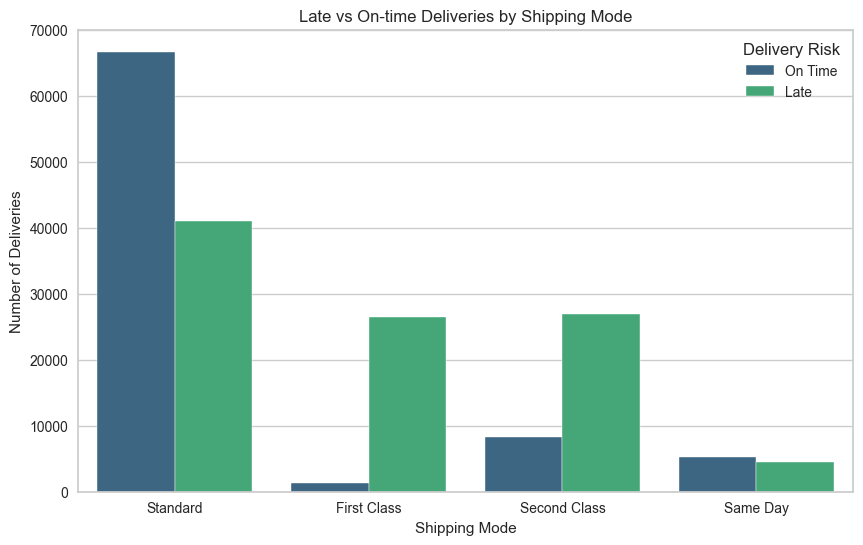

In [61]:
grouped_data = df.groupby(['shipping_mode', 'late_delivery_risk']).size().reset_index(name='count')
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6)) 
barplot = sns.barplot(data=grouped_data,
                      x='shipping_mode', 
                      y='count',
                      hue='late_delivery_risk',
                      palette='viridis', 
                      dodge=True, 
                      hue_order=[0, 1] )
plt.title('Late vs On-time Deliveries by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Deliveries')
regions = ['Standard', 'First Class', 'Second Class', 'Same Day']
plt.xticks(ticks=np.arange(len(regions)), labels=regions)
handles, labels = barplot.get_legend_handles_labels()
plt.legend(handles, ['On Time', 'Late'], title='Delivery Risk')

plt.show()

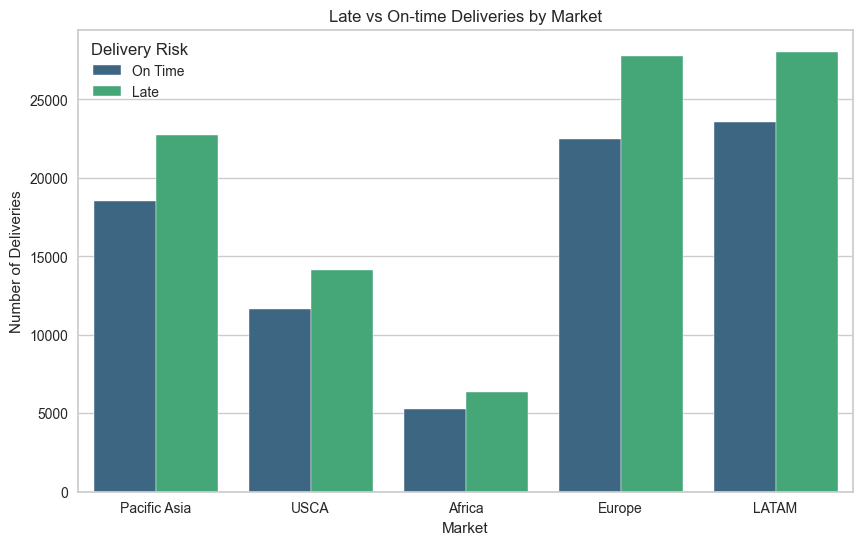

In [62]:
grouped_data = df.groupby(['market', 'late_delivery_risk']).size().reset_index(name='count')
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6)) 
barplot = sns.barplot(data=grouped_data,
                      x='market', 
                      y='count',
                      hue='late_delivery_risk',
                      palette='viridis', 
                      dodge=True, 
                      hue_order=[0, 1] )
plt.title('Late vs On-time Deliveries by Market')
plt.xlabel('Market')
plt.ylabel('Number of Deliveries')
regions = ['Pacific Asia', 'USCA', 'Africa', 'Europe', 'LATAM']
plt.xticks(ticks=np.arange(len(regions)), labels=regions)
handles, labels = barplot.get_legend_handles_labels()
plt.legend(handles, ['On Time', 'Late'], title='Delivery Risk')

plt.show()

In [63]:
top_states = df['order_state'].value_counts().head(10).index
print(top_states)

Index([36, 26, 33, 32, 40, 212, 47, 99, 16, 42], dtype='int64', name='order_state')


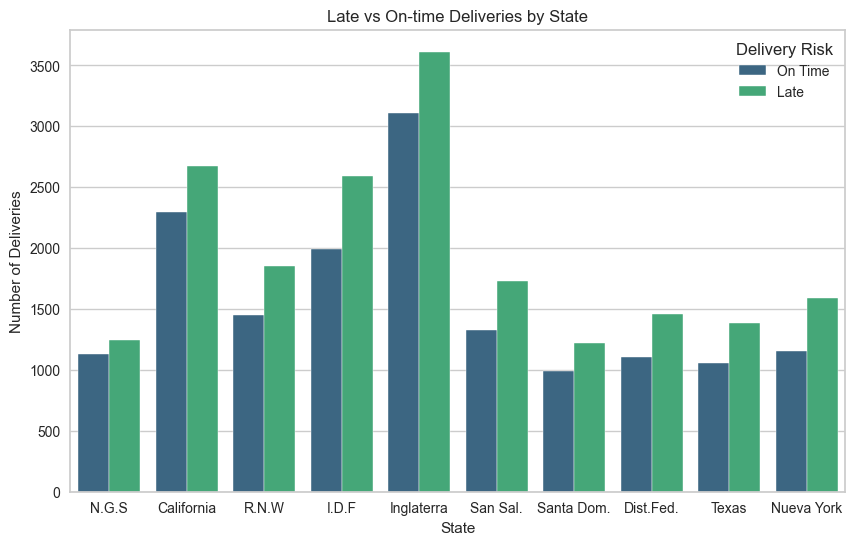

In [64]:
top_states = df['order_state'].value_counts().head(10).index

df_top_states = df[df['order_state'].isin(top_states)]
grouped_data = df_top_states.groupby(['order_state', 'late_delivery_risk']).size().reset_index(name='count')

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=grouped_data,
                      x='order_state', 
                      y='count',
                      hue='late_delivery_risk',
                      palette='viridis', 
                      dodge=True, 
                      hue_order=[0, 1])

plt.title('Late vs On-time Deliveries by State')
plt.xlabel('State')
plt.ylabel('Number of Deliveries')
regions=['N.G.S', 'California', 'R.N.W', 'I.D.F', 'Inglaterra', 'San Sal.', 'Santa Dom.', 'Dist.Fed.', 'Texas', 'Nueva York']
plt.xticks(ticks=np.arange(len(regions)), labels=regions)

handles, labels = barplot.get_legend_handles_labels()
plt.legend(handles, ['On Time', 'Late'], title='Delivery Risk')

plt.show()

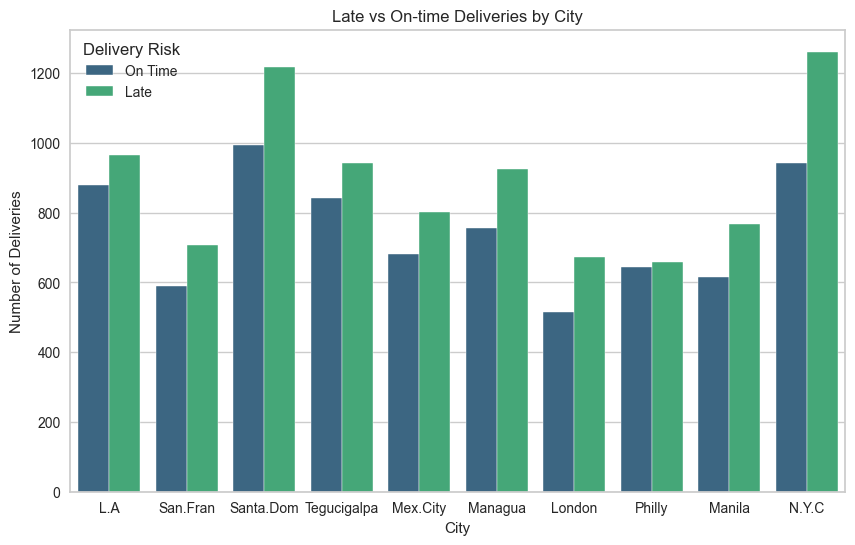

In [65]:
top_states = df['order_city'].value_counts().head(10).index

df_top_states = df[df['order_city'].isin(top_states)]
grouped_data = df_top_states.groupby(['order_city', 'late_delivery_risk']).size().reset_index(name='count')

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=grouped_data,
                      x='order_city', 
                      y='count',
                      hue='late_delivery_risk',
                      palette='viridis', 
                      dodge=True, 
                      hue_order=[0, 1])

plt.title('Late vs On-time Deliveries by City')
plt.xlabel('City')
plt.ylabel('Number of Deliveries')
regions = ['L.A', 'San.Fran','Santa.Dom','Tegucigalpa','Mex.City','Managua','London','Philly','Manila','N.Y.C',]
plt.xticks(ticks=np.arange(len(regions)), labels=regions)
handles, labels = barplot.get_legend_handles_labels()
plt.legend(handles, ['On Time', 'Late'], title='Delivery Risk')

plt.show()

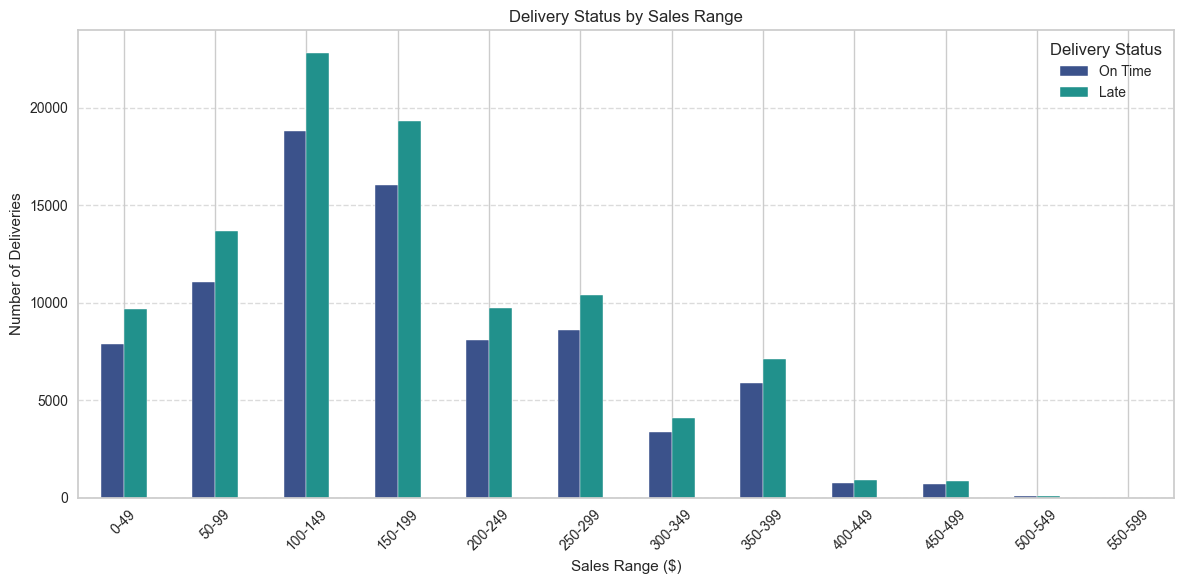

In [66]:
color1 = (59/255, 82/255, 139/255) 
color2 = (33/255, 145/255, 140/255)
bin_edges = list(range(0, 601, 50)) 
bin_labels = [f'{i}-{i+49}' for i in range(0, 600, 50)] 

df['sales_range'] = pd.cut(df['sales_per_customer'], bins=bin_edges, labels=bin_labels, right=False)

delivery_summary = df.groupby(['sales_range', 'late_delivery_risk']).size().unstack(fill_value=0)

delivery_summary.plot(kind='bar', stacked=False, color=[color1, color2], figsize=(12, 6))
plt.title('Delivery Status by Sales Range')
plt.xlabel('Sales Range ($)')
plt.ylabel('Number of Deliveries')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['On Time', 'Late'], title='Delivery Status')
plt.tight_layout()
plt.show()


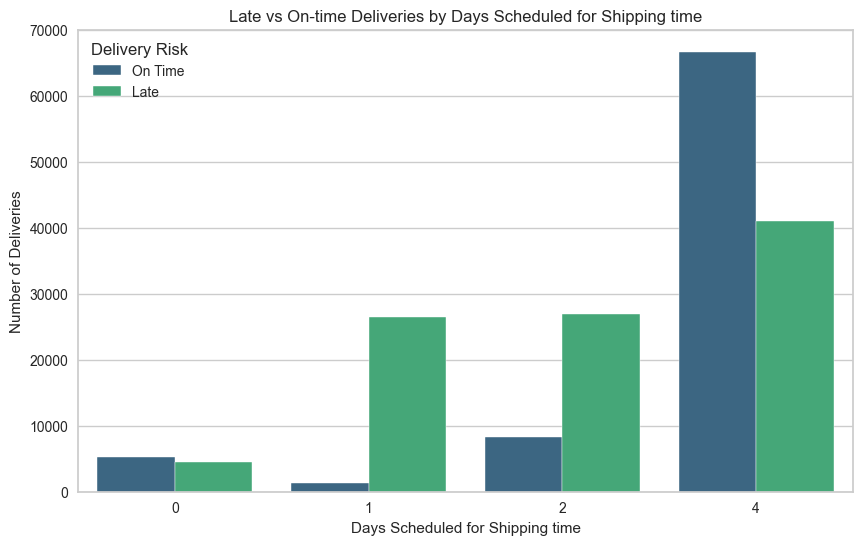

In [67]:
grouped_data = df.groupby(['days_for_shipment_scheduled', 'late_delivery_risk']).size().reset_index(name='count')
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6)) 
barplot = sns.barplot(data=grouped_data,
                      x='days_for_shipment_scheduled', 
                      y='count',
                      hue='late_delivery_risk',
                      palette='viridis', 
                      dodge=True, 
                      hue_order=[0, 1] )
plt.title('Late vs On-time Deliveries by Days Scheduled for Shipping time')
plt.xlabel('Days Scheduled for Shipping time')
plt.ylabel('Number of Deliveries')
handles, labels = barplot.get_legend_handles_labels()
plt.legend(handles, ['On Time', 'Late'], title='Delivery Risk')

plt.show()

## By Quarter

Y15 Q1 Q2 Q3 Q4 
Y16 Q1 Q2 Q3 Q4 
Y17 Q1 Q2 Q3 Q4 
Y18 *Q1 *Q2 *Q3 *Q4 (Prediction)

Be able to predict the outcome of late vs on time delivery, then get results for each quarter and use that to predict future performance based on predicted growth. Get predicted growth from sales data

In [68]:
print(df['shipping_date'].min())
print(df['shipping_date'].max())

2015-01-03 00:00:00
2018-02-06 22:14:00


In [69]:
df['Year'] = df['shipping_date'].dt.year
year_map = {2015: 'Y1', 2016: 'Y2', 2017: 'Y3', 2018: 'Y4'}
df['Year_Index'] = df['Year'].map(year_map)
print(df)

        type  days_for_shipping_real  days_for_shipment_scheduled  \
0          1                       3                            4   
1          2                       5                            4   
2          4                       4                            4   
3          1                       3                            4   
4          3                       2                            4   
...      ...                     ...                          ...   
180514     4                       4                            4   
180515     1                       3                            2   
180516     2                       5                            4   
180517     3                       3                            4   
180518     3                       4                            4   

        benefit_per_order  sales_per_customer  delivery_status  \
0               91.250000          314.640015                1   
1             -249.089996          311.

In [70]:
df['Year'] = df['shipping_date'].dt.year
df['Month'] = df['shipping_date'].dt.month
df['Quarter_Index'] = 'Y' + (df['Year'] - df['Year'].min() + 1).astype(str) + 'Q' + ((df['Month'] - 1) // 3 + 1).astype(str)
print(df)

        type  days_for_shipping_real  days_for_shipment_scheduled  \
0          1                       3                            4   
1          2                       5                            4   
2          4                       4                            4   
3          1                       3                            4   
4          3                       2                            4   
...      ...                     ...                          ...   
180514     4                       4                            4   
180515     1                       3                            2   
180516     2                       5                            4   
180517     3                       3                            4   
180518     3                       4                            4   

        benefit_per_order  sales_per_customer  delivery_status  \
0               91.250000          314.640015                1   
1             -249.089996          311.

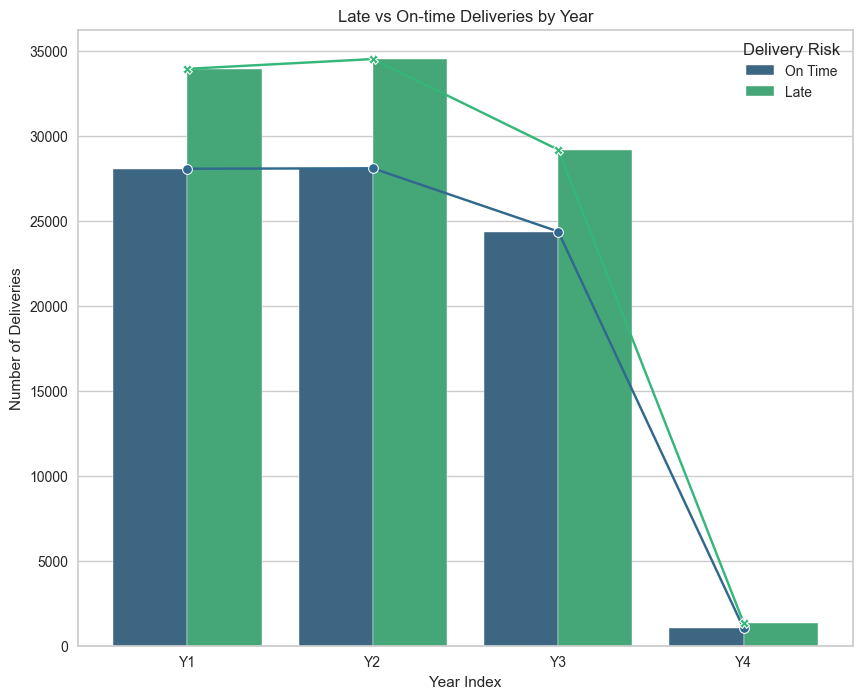

In [71]:
grouped_data = df.groupby(['Year_Index', 'late_delivery_risk']).size().reset_index(name='count')
plt.figure(figsize=(10, 8))
barplot = sns.barplot(data=grouped_data,
                      x='Year_Index',
                      y='count',
                      hue='late_delivery_risk',
                      palette='viridis',
                      dodge=True,
                      hue_order=[0, 1])
plt.title('Late vs On-time Deliveries by Year')
plt.xlabel('Year Index')
plt.ylabel('Number of Deliveries')

sns.lineplot(data=grouped_data,
             x='Year_Index',
             y='count',
             hue='late_delivery_risk',
             palette='viridis',
             style='late_delivery_risk',
             markers=True,
             dashes=False,
             legend=False)
handles, labels = barplot.get_legend_handles_labels()
plt.legend(handles, ['On Time', 'Late'], title='Delivery Risk')
plt.show()

<Axes: xlabel='Year_Index', ylabel='count'>

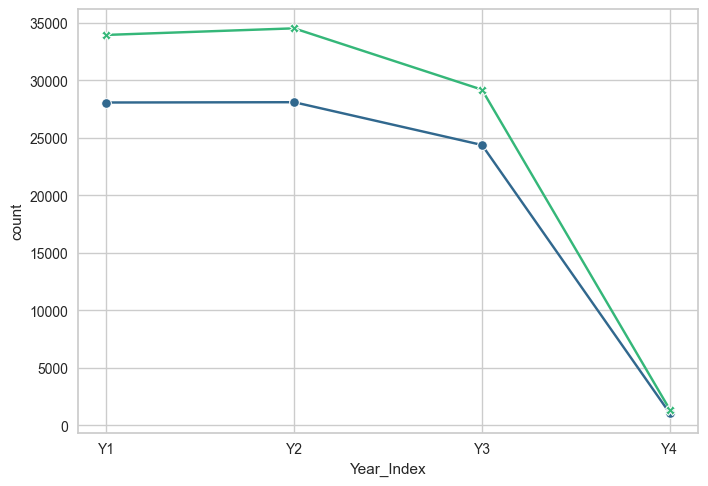

In [72]:
sns.lineplot(data=grouped_data,
             x='Year_Index',
             y='count',
             hue='late_delivery_risk',
             palette='viridis',
             style='late_delivery_risk',
             markers=True,
             dashes=False,
             legend=False)

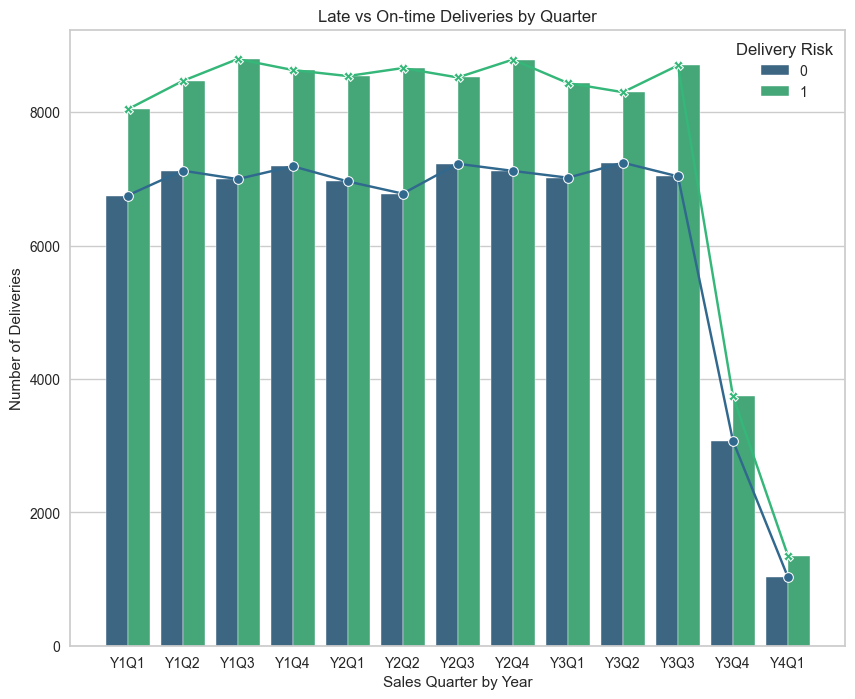

In [73]:
grouped_data = df.groupby(['Quarter_Index', 'late_delivery_risk']).size().reset_index(name='count')
plt.figure(figsize=(10, 8))
sns.barplot(data=grouped_data,
            x='Quarter_Index',
            y='count',
            hue='late_delivery_risk',
            palette='viridis',
            dodge=True,
            hue_order=[0, 1])
plt.title('Late vs On-time Deliveries by Quarter')
plt.xlabel('Sales Quarter by Year')
plt.ylabel('Number of Deliveries')
plt.legend(title='Delivery Risk')

sns.lineplot(data=grouped_data,
             x='Quarter_Index',
             y='count',
             hue='late_delivery_risk',
             palette='viridis',
             style='late_delivery_risk',
             markers=True,
             dashes=False,
             legend=False)
plt.show()

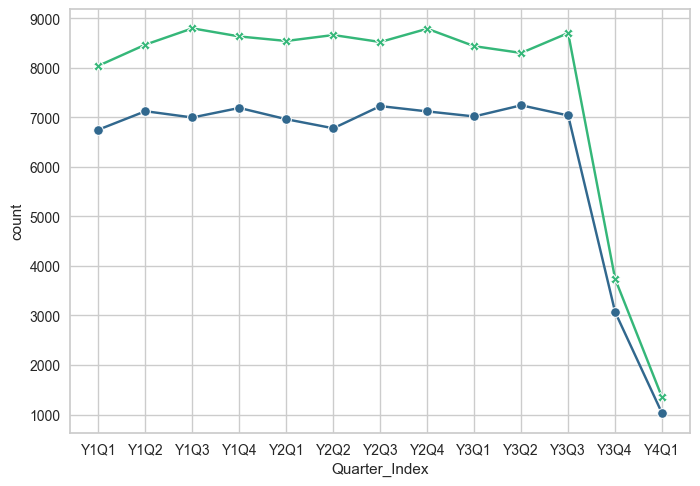

In [74]:
sns.lineplot(data=grouped_data,
             x='Quarter_Index',
             y='count',
             hue='late_delivery_risk',
             palette='viridis',
             style='late_delivery_risk',
             markers=True,
             dashes=False,
             legend=False)
plt.show()

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   type                         180519 non-null  int64         
 1   days_for_shipping_real       180519 non-null  int64         
 2   days_for_shipment_scheduled  180519 non-null  int64         
 3   benefit_per_order            180519 non-null  float64       
 4   sales_per_customer           180519 non-null  float64       
 5   delivery_status              180519 non-null  int64         
 6   late_delivery_risk           180519 non-null  int64         
 7   category_id                  180519 non-null  int64         
 8   customer_city                180519 non-null  int64         
 9   customer_country             180519 non-null  int64         
 10  customer_id                  180519 non-null  int64         
 11  customer_segment          

In [76]:
df['sales_range'] = df['sales_range'].replace({ 
    '100-149': 149,
    '150-199': 199,
    '50-99': 99,
    '250-299': 299,
    '200-249': 249,
    '0-49': 49,
    '350-399': 399,
    '300-349': 349,
    '400-449': 449,
    '450-499': 499,
    '500-549': 549,
    '550-599': 599,
    '900-949': 949,
    '950-999': 999,
    '850-899': 899,
    '600-649': 649,
    '650-699': 699,
    '700-749': 749,
    '750-799': 799,
    '800-849': 849 })

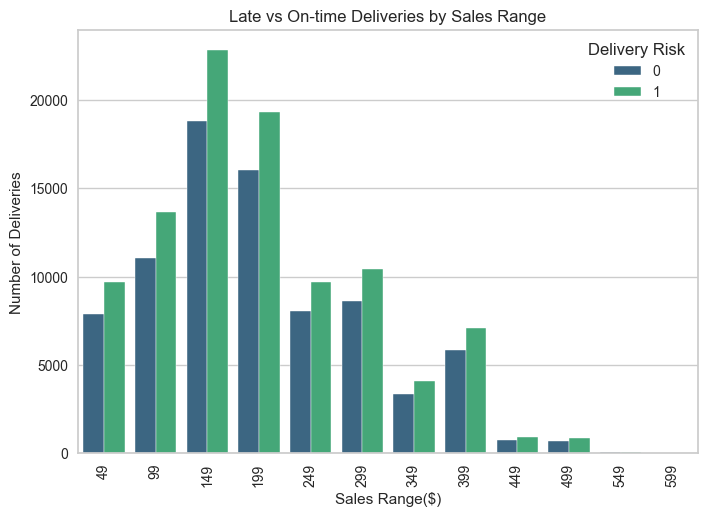

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

grouped_data = df.groupby(['sales_range', 'late_delivery_risk']).size().reset_index(name='count')
sns.barplot(data=grouped_data,
            x='sales_range',
            y='count',
            hue='late_delivery_risk',
            palette='viridis',
            dodge=True,
            hue_order=[0, 1])
plt.title('Late vs On-time Deliveries by Sales Range')
plt.xlabel('Sales Range($)')
plt.ylabel('Number of Deliveries')
plt.legend(title='Delivery Risk')

plt.xticks( rotation=90)
plt.show()


<Axes: xlabel='sales_range', ylabel='count'>

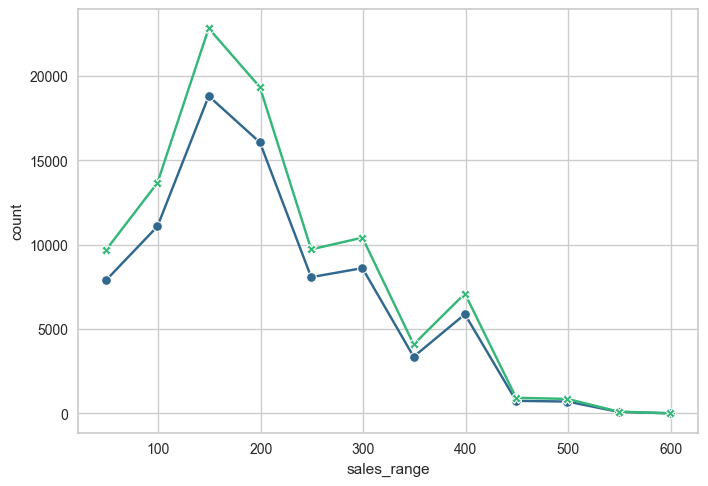

In [78]:
# Overlay line plot
sns.lineplot(data=grouped_data,
             x='sales_range',
             y='count',
             hue='late_delivery_risk',
             palette='viridis',
             style='late_delivery_risk',
             markers=True,
             dashes=False,
             legend=False)

# objective 2

# Machine Learning algorithms (Classification problem)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   type                         180519 non-null  int64         
 1   days_for_shipping_real       180519 non-null  int64         
 2   days_for_shipment_scheduled  180519 non-null  int64         
 3   benefit_per_order            180519 non-null  float64       
 4   sales_per_customer           180519 non-null  float64       
 5   delivery_status              180519 non-null  int64         
 6   late_delivery_risk           180519 non-null  int64         
 7   category_id                  180519 non-null  int64         
 8   customer_city                180519 non-null  int64         
 9   customer_country             180519 non-null  int64         
 10  customer_id                  180519 non-null  int64         
 11  customer_segment          

In [80]:
df = df.drop(columns=['sales_range', 'Year_Index','Quarter_Index','shipping_date','order_date','days_for_shipping_real', 'days_for_shipping_real','delivery_status'])



In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   type                         180519 non-null  int64  
 1   days_for_shipment_scheduled  180519 non-null  int64  
 2   benefit_per_order            180519 non-null  float64
 3   sales_per_customer           180519 non-null  float64
 4   late_delivery_risk           180519 non-null  int64  
 5   category_id                  180519 non-null  int64  
 6   customer_city                180519 non-null  int64  
 7   customer_country             180519 non-null  int64  
 8   customer_id                  180519 non-null  int64  
 9   customer_segment             180519 non-null  int64  
 10  customer_state               180519 non-null  int64  
 11  customer_street              180519 non-null  int64  
 12  customer_zipcode             180516 non-null  float64
 13 

## Gradient boosted Classifier

In [82]:
df.isnull().sum()

type                           0
days_for_shipment_scheduled    0
benefit_per_order              0
sales_per_customer             0
late_delivery_risk             0
category_id                    0
customer_city                  0
customer_country               0
customer_id                    0
customer_segment               0
customer_state                 0
customer_street                0
customer_zipcode               3
department_id                  0
latitude                       0
longitude                      0
market                         0
order_city                     0
order_country                  0
order_customer_id              0
order_id                       0
order_item_cardprod_id         0
order_item_discount            0
order_item_discount_rate       0
order_item_id                  0
order_item_product_price       0
order_item_profit_ratio        0
order_item_quantity            0
sales                          0
order_item_total               0
order_prof

In [83]:
df['customer_zipcode'].median()

19380.0

In [84]:
df['customer_zipcode'].fillna (19380.0, inplace=True)

In [85]:
X = df.drop('late_delivery_risk', axis=1)
y = df['late_delivery_risk']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [87]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

y_pred = gbrt.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Acuracy on training set: {gbrt.score(X_train, y_train):.3f}")
print(f"Acuracy on test set: {gbrt.score(X_test, y_test):.3f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Acuracy on training set: 0.714
Acuracy on test set: 0.716

Confusion Matrix:
[[14779  1605]
 [ 8653 11067]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.90      0.74     16384
           1       0.87      0.56      0.68     19720

    accuracy                           0.72     36104
   macro avg       0.75      0.73      0.71     36104
weighted avg       0.76      0.72      0.71     36104



In [88]:
print("Predicted probabilities:")
print(gbrt.predict_proba(X_test[:6]))

Predicted probabilities:
[[0.0102012  0.9897988 ]
 [0.59902366 0.40097634]
 [0.59356948 0.40643052]
 [0.01180369 0.98819631]
 [0.57402317 0.42597683]
 [0.59740225 0.40259775]]


In [89]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2, learning_rate=0.05)
gbrt.fit(X_train, y_train)

y_pred = gbrt.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy on training set: {gbrt.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {gbrt.score(X_test, y_test):.3f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy on training set: 0.705
Accuracy on test set: 0.709

Confusion Matrix:
[[14224  2160]
 [ 8341 11379]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.87      0.73     16384
           1       0.84      0.58      0.68     19720

    accuracy                           0.71     36104
   macro avg       0.74      0.72      0.71     36104
weighted avg       0.75      0.71      0.71     36104



In [90]:
print("Predicted probabilities:")
print(gbrt.predict_proba(X_test[:6]))

Predicted probabilities:
[[0.05744593 0.94255407]
 [0.59504726 0.40495274]
 [0.59504726 0.40495274]
 [0.05744593 0.94255407]
 [0.49757378 0.50242622]
 [0.59504726 0.40495274]]


In [91]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=4, learning_rate=1)
gbrt.fit(X_train, y_train)

y_pred = gbrt.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy on training set: {gbrt.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {gbrt.score(X_test, y_test):.3f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy on training set: 0.772
Accuracy on test set: 0.743

Confusion Matrix:
[[13086  3298]
 [ 5984 13736]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74     16384
           1       0.81      0.70      0.75     19720

    accuracy                           0.74     36104
   macro avg       0.75      0.75      0.74     36104
weighted avg       0.75      0.74      0.74     36104



In [92]:
print("Predicted probabilities:")
print(gbrt.predict_proba(X_test[:6]))

Predicted probabilities:
[[0.00341834 0.99658166]
 [0.41226823 0.58773177]
 [0.69522958 0.30477042]
 [0.01090477 0.98909523]
 [0.96263825 0.03736175]
 [0.63883845 0.36116155]]


## SVM

In [93]:
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.7, stratify=y, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=0)

svm_pipeline = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=0))

svm_pipeline.fit(X_train, y_train)

y_pred = svm_pipeline.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy on training set: {svm_pipeline.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {svm_pipeline.score(X_test, y_test):.3f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy on training set: 0.694
Accuracy on test set: 0.691

Confusion Matrix:
[[4004  888]
 [2458 3481]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.82      0.71      4892
           1       0.80      0.59      0.68      5939

    accuracy                           0.69     10831
   macro avg       0.71      0.70      0.69     10831
weighted avg       0.72      0.69      0.69     10831



In [94]:
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.6, stratify=y, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=0)

svm_pipeline = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=0, C=0.1))

svm_pipeline.fit(X_train, y_train)

y_pred = svm_pipeline.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy on training set: {svm_pipeline.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {svm_pipeline.score(X_test, y_test):.3f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy on training set: 0.694
Accuracy on test set: 0.689

Confusion Matrix:
[[5375 1200]
 [3294 4573]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.82      0.71      6575
           1       0.79      0.58      0.67      7867

    accuracy                           0.69     14442
   macro avg       0.71      0.70      0.69     14442
weighted avg       0.71      0.69      0.69     14442



In [95]:
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.7, stratify=y, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=0)

svm_pipeline = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=0, C=0.5,))

svm_pipeline.fit(X_train, y_train)

y_pred = svm_pipeline.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy on training set: {svm_pipeline.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {svm_pipeline.score(X_test, y_test):.3f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy on training set: 0.694
Accuracy on test set: 0.691

Confusion Matrix:
[[4004  888]
 [2458 3481]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.82      0.71      4892
           1       0.80      0.59      0.68      5939

    accuracy                           0.69     10831
   macro avg       0.71      0.70      0.69     10831
weighted avg       0.72      0.69      0.69     10831



## Naive Bayes 

In [96]:
X = df.drop('late_delivery_risk', axis=1)  
y = df['late_delivery_risk']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy on training set: {gnb.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {gnb.score(X_test, y_test):.3f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy on training set: 0.689
Accuracy on test set: 0.693

Confusion Matrix:
[[13374  3010]
 [ 8087 11633]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.82      0.71     16384
           1       0.79      0.59      0.68     19720

    accuracy                           0.69     36104
   macro avg       0.71      0.70      0.69     36104
weighted avg       0.72      0.69      0.69     36104



In [98]:
from sklearn.preprocessing import MinMaxScaler

X = df.drop('late_delivery_risk', axis=1)
y = df['late_delivery_risk']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy on training set: {gnb.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {gnb.score(X_test, y_test):.3f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy on training set: 0.689
Accuracy on test set: 0.693

Confusion Matrix:
[[13374  3010]
 [ 8087 11633]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.82      0.71     16384
           1       0.79      0.59      0.68     19720

    accuracy                           0.69     36104
   macro avg       0.71      0.70      0.69     36104
weighted avg       0.72      0.69      0.69     36104



# Objective 2

# Customer Segmentation

## PCA

In [99]:
df_no_target = df.drop(columns=["late_delivery_risk"])
pca = PCA().fit(df_no_target) 

In [100]:
df_no_target = df.drop(columns=["late_delivery_risk"])

scaler = StandardScaler()
scaled_ds = scaler.fit_transform(df_no_target)

pca = PCA(n_components=3)
PCA_ds = pd.DataFrame(pca.fit_transform(scaled_ds), columns=["col1", "col2", "col3"])

summary = PCA_ds.describe().T
print(summary)

         count          mean       std       min       25%       50%  \
col1  180519.0  2.015289e-17  2.500059 -5.050226 -1.747764 -0.923240   
col2  180519.0 -1.918854e-18  1.969002 -3.719197 -2.347309  0.636376   
col3  180519.0 -3.778666e-17  1.843902 -8.095758 -1.016234  0.012532   

           75%        max  
col1  1.650839  23.351730  
col2  1.645455   4.371795  
col3  1.086926  21.566571  


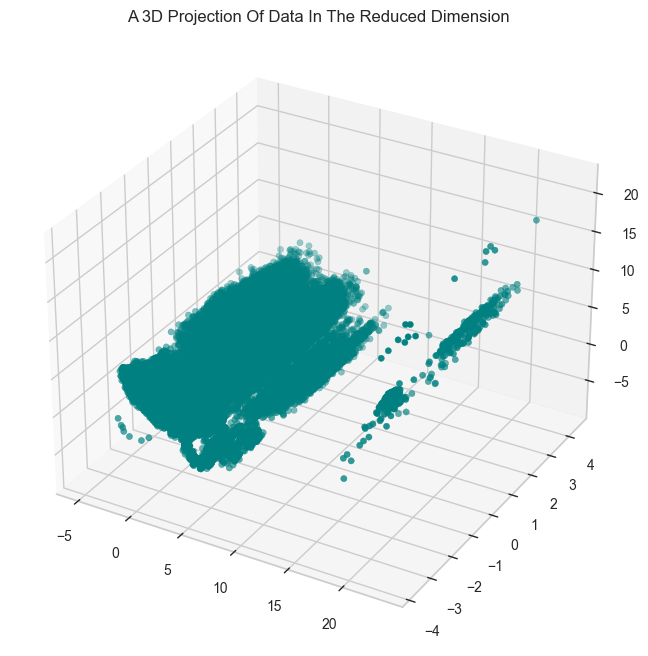

In [101]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="teal", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## Elbow Method

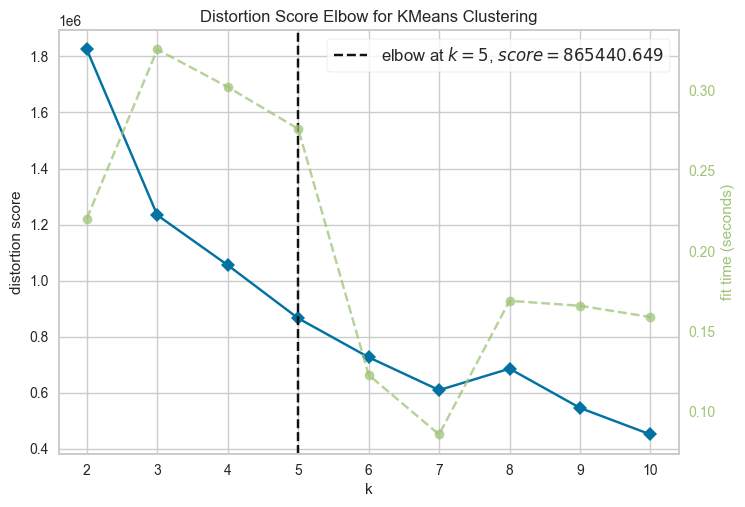

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [102]:
Elbow_M = KElbowVisualizer(KMeans(random_state=0), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

# K means Klustering

In [103]:
kmeans = KMeans(n_clusters=4, random_state=0)
yhat_kmeans = kmeans.fit_predict(PCA_ds)

PCA_ds["Clusters"] = yhat_kmeans
df["Clusters"] = yhat_kmeans

In [104]:
df["Clusters"]

0         3
1         3
2         2
3         2
4         3
         ..
180514    2
180515    2
180516    2
180517    3
180518    3
Name: Clusters, Length: 180519, dtype: int32

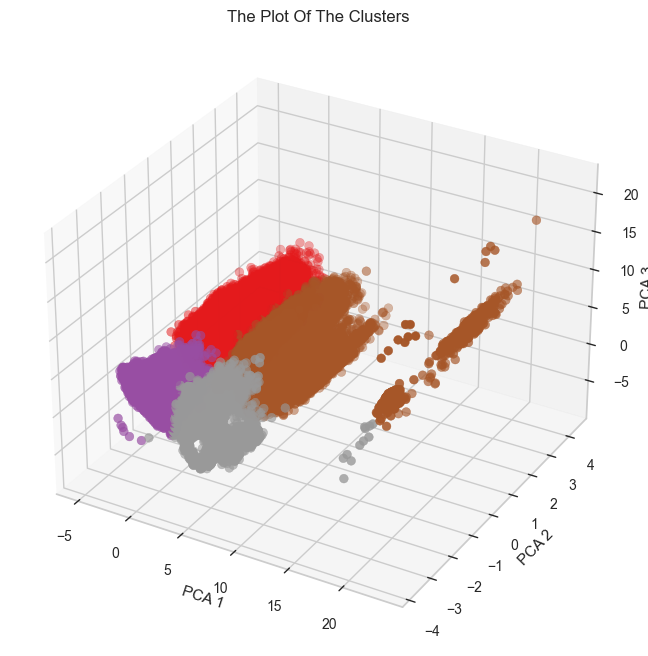

In [105]:
x = PCA_ds['col1']
y = PCA_ds['col2']
z = PCA_ds['col3']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

cmap = plt.get_cmap('Set1')
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap=cmap)
ax.set_title("The Plot Of The Clusters")

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

plt.show()

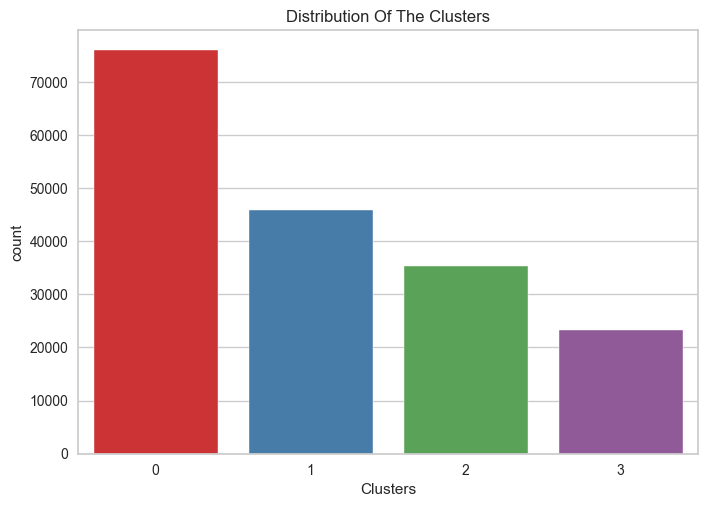

In [106]:
pl = sns.countplot(x=df["Clusters"], palette='Set1')
pl.set_title("Distribution Of The Clusters")
plt.show()

In [107]:
df

,type,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,late_delivery_risk,category_id,customer_city,customer_country,customer_id,customer_segment,customer_state,customer_street,customer_zipcode,department_id,latitude,longitude,market,order_city,order_country,order_customer_id,order_id,order_item_cardprod_id,order_item_discount,order_item_discount_rate,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total,order_profit_per_order,order_region,order_state,order_status,product_category_id,product_price,shipping_mode,Year,Month,Clusters
0,1,4,91.250000,314.640015,0,73,0,1,20755,0,0,0,725.0,2,18.251453,-66.037056,0,0,0,20755,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,0,0,0,73,327.750000,0,2018,2,3
1,2,4,-249.089996,311.359985,1,73,0,1,19492,0,0,1,725.0,2,18.279451,-66.037064,0,1,1,19492,75939,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,1,1,1,73,327.750000,0,2018,1,3
2,4,4,-247.779999,309.720001,0,73,1,0,19491,0,1,2,95125.0,2,37.292233,-121.881279,0,1,1,19491,75938,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,1,1,2,73,327.750000,0,2018,1,2
3,1,4,22.860001,304.809998,0,73,2,0,19490,2,1,3,90027.0,2,34.125946,-118.291016,0,2,2,19490,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,2,2,0,73,327.750000,0,2018,1,2
4,3,4,134.210007,298.250000,0,73,0,1,19489,1,0,4,725.0,2,18.253769,-66.037048,0,2,2,19489,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,2,2,3,73,327.750000,0,2018,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,4,4,40.000000,399.980011,0,45,127,0,1005,2,2,6340,11207.0,7,40.640930,-73.942711,0,278,3,1005,26043,1004,0.000000,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,3,199,2,45,399.980011,0,2016,1,2
180515,1,2,-613.770019,395.980011,1,45,31,0,9141,1,1,4485,93304.0,7,35.362545,-119.018700,0,499,4,9141,26037,1004,4.000000,0.01,65161,399.980011,-1.55,1,399.980011,395.980011,-613.770019,3,314,0,45,399.980011,2,2016,1,2
180516,2,4,141.110001,391.980011,1,45,510,0,291,1,30,2874,6010.0,7,41.629959,-72.967155,0,193,2,291,26024,1004,8.000000,0.02,65129,399.980011,0.36,1,399.980011,391.980011,141.110001,2,22,1,45,399.980011,0,2016,1,2
180517,3,4,186.229996,387.980011,0,45,0,1,2813,0,0,572,725.0,7,18.213350,-66.370575,0,193,2,2813,26022,1004,12.000000,0.03,65126,399.980011,0.48,1,399.980011,387.980011,186.229996,2,22,3,45,399.980011,0,2016,1,3


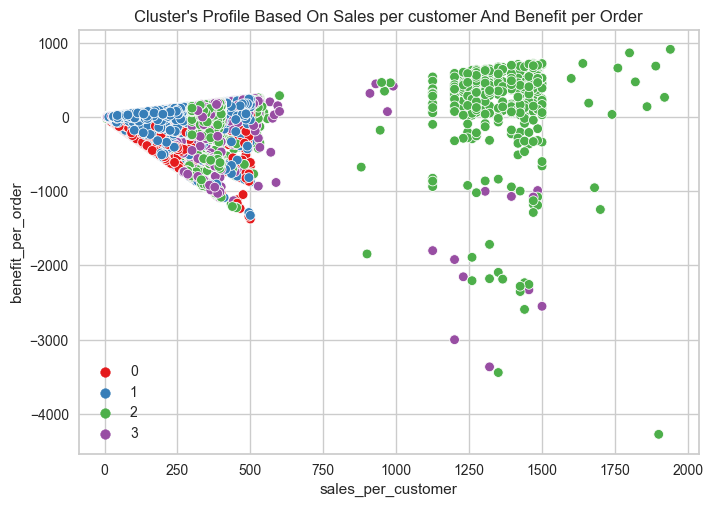

In [108]:
pl = sns.scatterplot(data = df,x=df["sales_per_customer"], y=df['benefit_per_order'],hue=df["Clusters"],palette='Set1')
pl.set_title("Cluster's Profile Based On Sales per customer And Benefit per Order")
plt.legend()
plt.show()

Green): High Sales High Benefit (Premium users)
Blue): Moderate sales and moderate benefits
Purple): Moderate sales but low benefits
Red): Low sales and low benefit


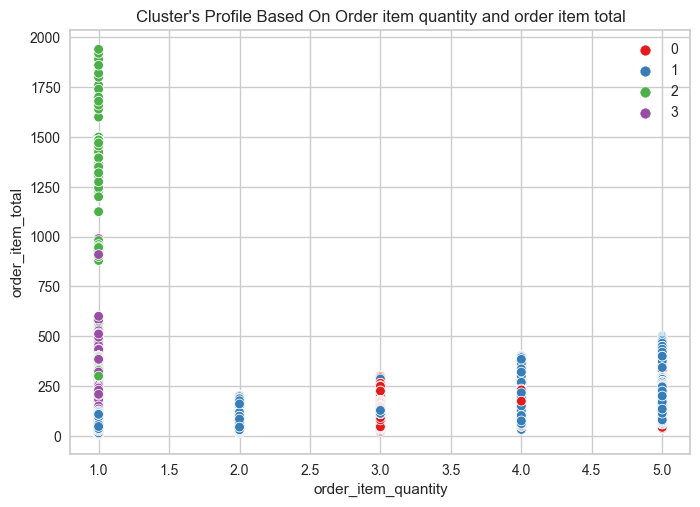

In [109]:
pl = sns.scatterplot(data = df,x=df["order_item_quantity"], y=df['order_item_total'],hue=df["Clusters"],palette='Set1')
pl.set_title("Cluster's Profile Based On Order item quantity and order item total")
plt.legend()
plt.show()

Green: Buys less quantity but pays more, premium buyer
Blue: Buys more quanitity buy pays less,
purple: in the middle
Red: Buys less quanitity and pays less

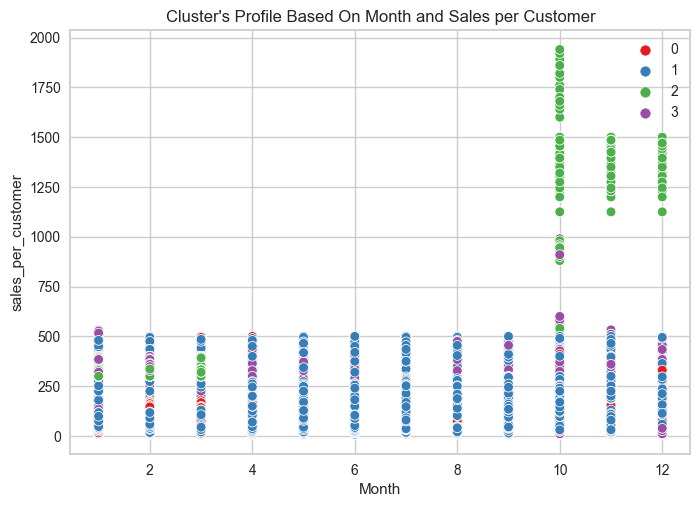

In [110]:
pl = sns.scatterplot(data = df,x=df["Month"], y=df['sales_per_customer'],hue=df["Clusters"],palette='Set1')
pl.set_title("Cluster's Profile Based On Month and Sales per Customer")
plt.legend()
plt.show()

Grreen spends a lot around Oct-Dec possibly due to seasonal conditions ?

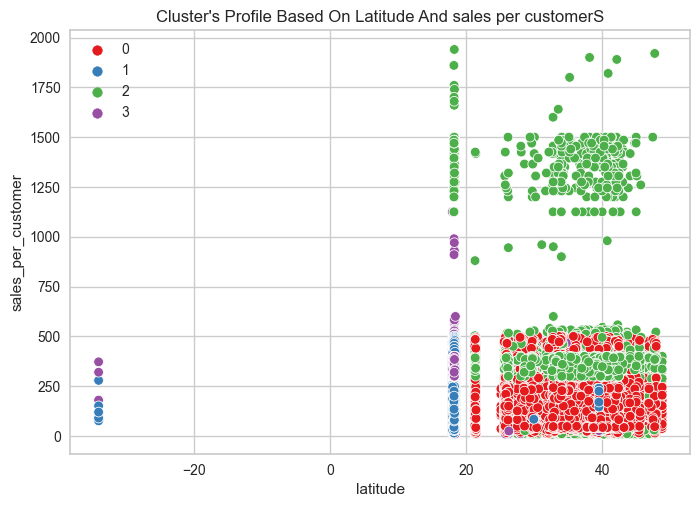

In [111]:
pl = sns.scatterplot(data = df,x=df["latitude"], y=df['sales_per_customer'],hue=df["Clusters"],palette='Set1')
pl.set_title("Cluster's Profile Based On Latitude And sales per customerS")
plt.legend()
plt.show()

The majority of our customers are based in the northern hemisphere

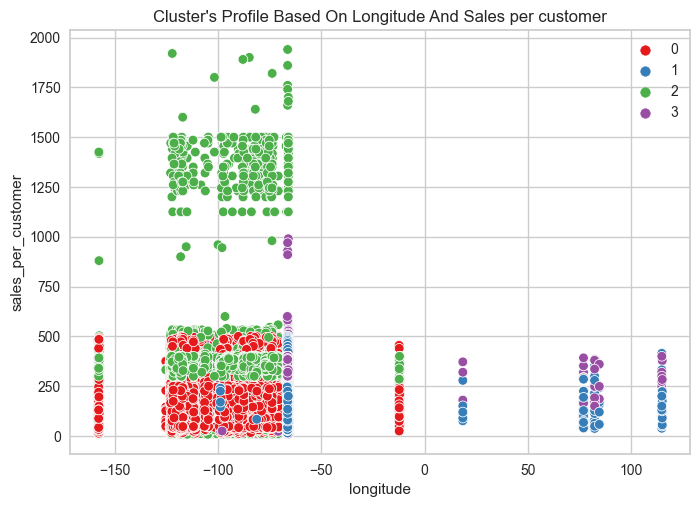

In [112]:
pl = sns.scatterplot(data = df,x=df["longitude"], y=df['sales_per_customer'],hue=df["Clusters"],palette='Set1')
pl.set_title("Cluster's Profile Based On Longitude And Sales per customer")
plt.legend()
plt.show()

The majority of our customers are in the Americas (Specifically North America when combined with latitude)

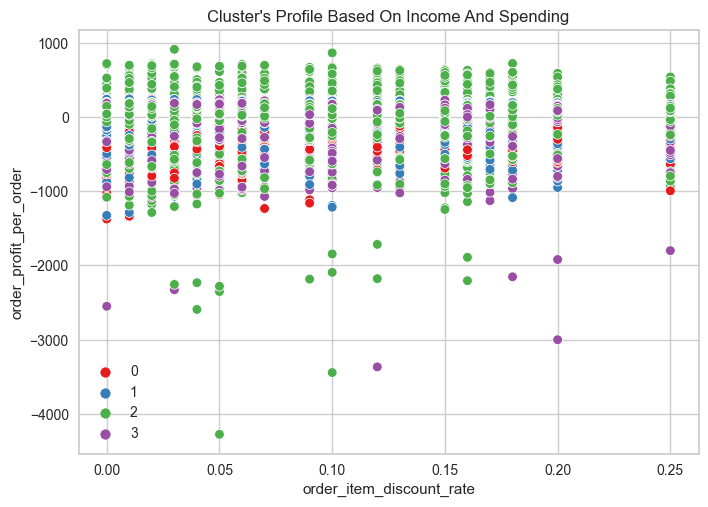

In [113]:
pl = sns.scatterplot(data = df,x=df["order_item_discount_rate"], y=df['order_profit_per_order'],hue=df["Clusters"],palette='Set1')
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

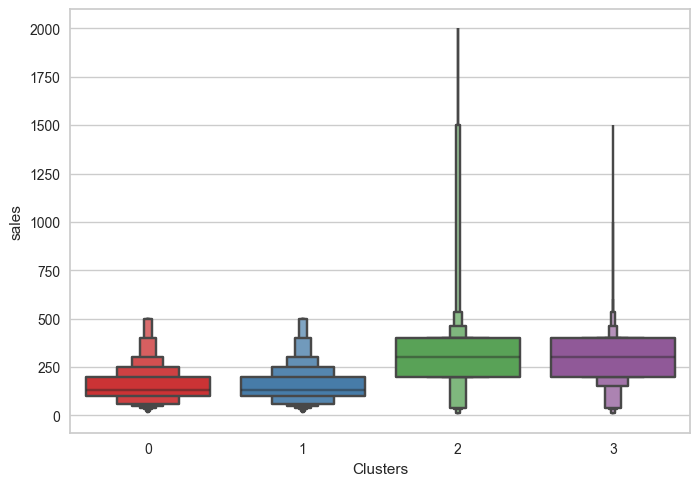

In [114]:
plt.figure()
pl=sns.boxenplot(x=df["Clusters"], y=df["sales"], palette='Set1')
plt.show()

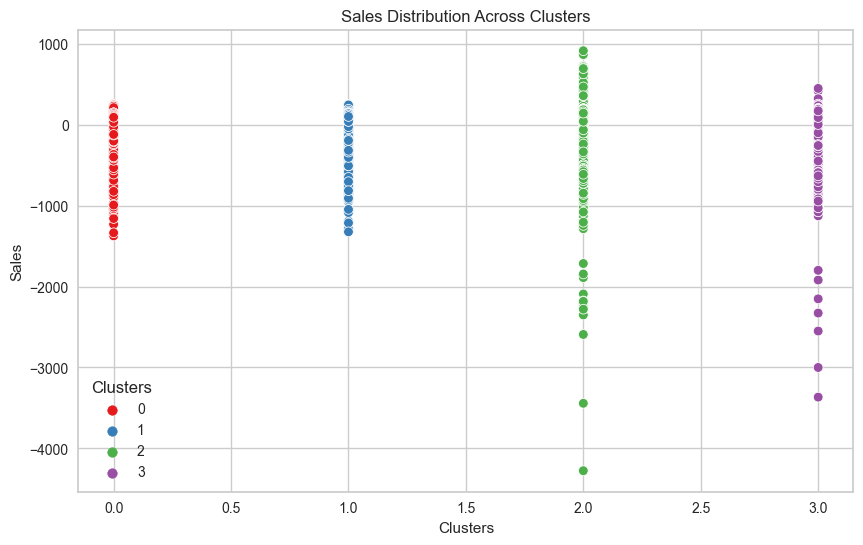

In [115]:
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data = df,x=df["Clusters"], y=df['benefit_per_order'],hue=df["Clusters"],palette='Set1')

plt.grid(True)
plt.xlabel('Clusters')  
plt.ylabel('Sales')     
plt.title('Sales Distribution Across Clusters')
plt.show()

In [116]:
df.head()

,type,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,late_delivery_risk,category_id,customer_city,customer_country,customer_id,customer_segment,customer_state,customer_street,customer_zipcode,department_id,latitude,longitude,market,order_city,order_country,order_customer_id,order_id,order_item_cardprod_id,order_item_discount,order_item_discount_rate,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total,order_profit_per_order,order_region,order_state,order_status,product_category_id,product_price,shipping_mode,Year,Month,Clusters
0,1,4,91.250000,314.640015,0,73,0,1,20755,0,0,0,725.0,2,18.251453,-66.037056,0,0,0,20755,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,0,0,0,73,327.75,0,2018,2,3
1,2,4,-249.089996,311.359985,1,73,0,1,19492,0,0,1,725.0,2,18.279451,-66.037064,0,1,1,19492,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,1,1,1,73,327.75,0,2018,1,3
2,4,4,-247.779999,309.720001,0,73,1,0,19491,0,1,2,95125.0,2,37.292233,-121.881279,0,1,1,19491,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,1,1,2,73,327.75,0,2018,1,2
3,1,4,22.860001,304.809998,0,73,2,0,19490,2,1,3,90027.0,2,34.125946,-118.291016,0,2,2,19490,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,2,2,0,73,327.75,0,2018,1,2
4,3,4,134.210007,298.250000,0,73,0,1,19489,1,0,4,725.0,2,18.253769,-66.037048,0,2,2,19489,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,2,2,3,73,327.75,0,2018,1,3
